In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("eda_data.csv")

In [4]:
df.head(5)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [6]:
df.drop(columns= ['Unnamed: 0','Job Description'],inplace = True)

In [7]:
df.drop(columns = ["Job Title"], inplace = True)

In [8]:
 df["MinSal"]=df["Salary Estimate"].str.split("-",expand=True)[0]

In [9]:
 df["MaxSal"]=df["Salary Estimate"].str.split("-",expand=True)[1]

In [10]:
df.MaxSal = df.MaxSal.str.split("(",expand=True)[0]

In [11]:
df.MaxSal = df.MaxSal.str.replace("K ", "")

In [12]:
df.MaxSal = df.MaxSal.str.replace("K", "")

In [13]:
df.MaxSal = df.MaxSal.str.replace("$", "")

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\1527229105.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.MaxSal = df.MaxSal.str.replace("$", "")


In [14]:
df=df[df["MaxSal"].str.contains("Per Hour")==False]

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\949106500.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MaxSal)


<Axes: xlabel='MaxSal', ylabel='Density'>

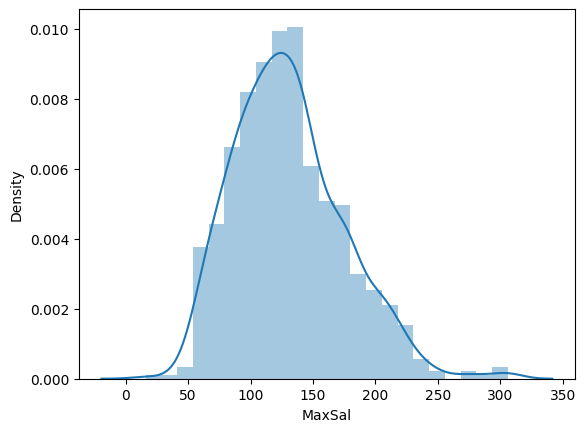

In [15]:
sns.distplot(df.MaxSal)

In [16]:
df.MaxSal=df.MaxSal.astype("int32")

In [17]:
df.MinSal = df.MinSal.str.replace("K", "")

In [18]:
df.MinSal = df.MinSal.str.replace("$", "")

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\1751802583.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.MinSal = df.MinSal.str.replace("$", "")


In [19]:
df.MinSal = df.MinSal.str.replace("Employer Provided Salary:", "")

In [20]:
df.MinSal=df.MinSal.astype("int32")

In [21]:
df.MinSal

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: MinSal, Length: 718, dtype: int32

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\758669081.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.MinSal)


<Axes: xlabel='MinSal', ylabel='Density'>

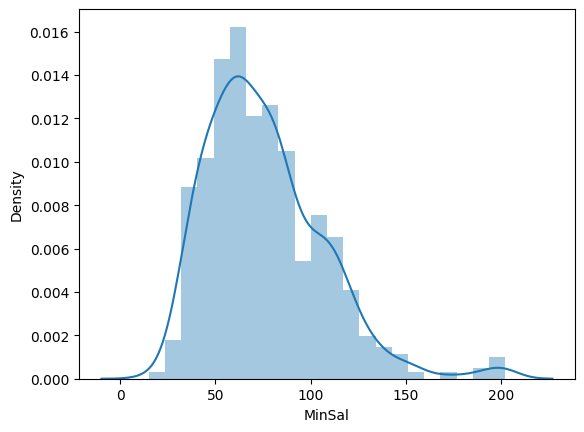

In [22]:
sns.distplot(df.MinSal)

In [23]:
df =df.drop(columns = "Salary Estimate")

In [24]:
df.columns

Index(['Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'MinSal', 'MaxSal'],
      dtype='object')

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\2256510704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"])


<Axes: xlabel='Rating', ylabel='Density'>

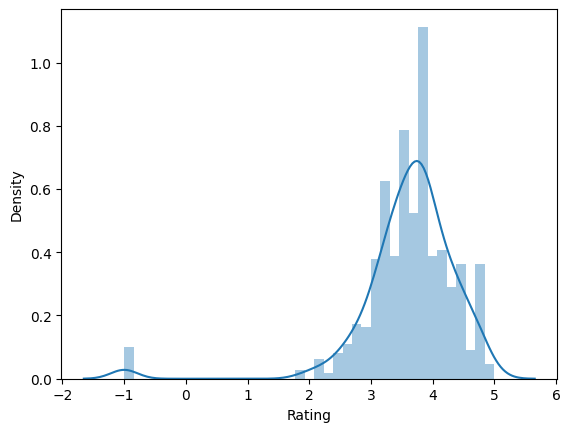

In [25]:
sns.distplot(df["Rating"])

In [26]:
df.Rating.mean()

3.6217270194986066

Replacing missing rating  with Average Rating

In [27]:
df.Rating[df.Rating == -1] = 3.6

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\828180443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Rating[df.Rating == -1] = 3.6


C:\Users\subar\AppData\Local\Temp\ipykernel_20356\2256510704.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Rating"])


<Axes: xlabel='Rating', ylabel='Density'>

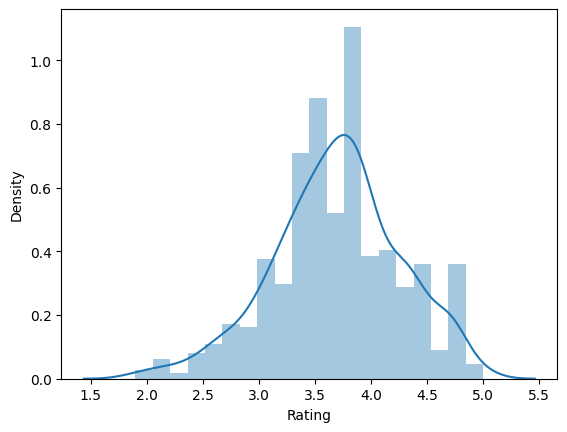

In [28]:
sns.distplot(df["Rating"])

In [29]:
df =df.drop(columns = ['Company Name'])

In [30]:
df.columns

Index(['Rating', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'MinSal', 'MaxSal'],
      dtype='object')

In [31]:
df =df.drop(columns = ['Headquarters'])

<Axes: >

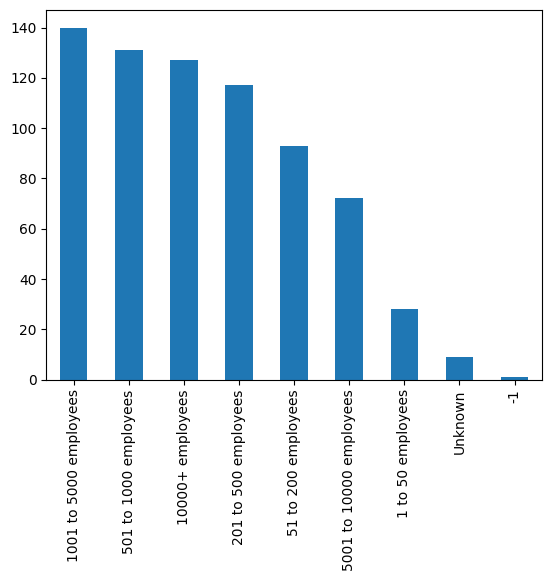

In [32]:
df.Size.value_counts().plot(kind = "bar")

In [33]:
df.Size = df.Size.str.replace("employees", "")

In [34]:
df1 = df.Size[df.Size.str.contains("to")].str.split("to" , expand =True)[1]

In [35]:
df1

0       1000 
2       1000 
3       5000 
4        200 
5        500 
        ...  
735      500 
738     5000 
739     1000 
740       50 
741     1000 
Name: 1, Length: 581, dtype: object

In [36]:
df.Size[df.Size=="Unknown"  ] = 500

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\363293792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Size[df.Size=="Unknown"  ] = 500


In [37]:
df.Size[df.Size=="-1" ] = 500

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\3034786008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Size[df.Size=="-1" ] = 500


In [38]:
df2 = df1.append(df.Size[df.Size==500 ])

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\291047758.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df1.append(df.Size[df.Size==500 ])


<Axes: >

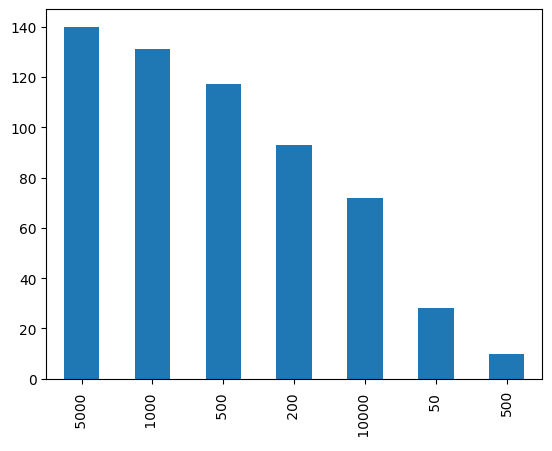

In [39]:
df2.value_counts().plot(kind = "bar")

In [40]:
df1 = df.Size[df.Size.str.contains("to") == False]

In [41]:
df1=df1.str.replace("+", '')

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\3748546604.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df1=df1.str.replace("+", '')


In [42]:
df1

1      10000 
8      10000 
12     10000 
14     10000 
25     10000 
        ...  
702    10000 
708    10000 
710    10000 
736    10000 
737    10000 
Name: Size, Length: 127, dtype: object

In [43]:
df2

0       1000 
2       1000 
3       5000 
4        200 
5        500 
        ...  
551       500
581       500
609       500
641       500
730       500
Length: 591, dtype: object

In [44]:
df2 = df2.append(df1)

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\1609705850.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df1)


In [45]:
df.Size

0       501 to 1000 
1            10000+ 
2       501 to 1000 
3      1001 to 5000 
4         51 to 200 
           ...      
737          10000+ 
738    1001 to 5000 
739     501 to 1000 
740         1 to 50 
741     501 to 1000 
Name: Size, Length: 718, dtype: object

In [46]:
df2 = df2.sort_index()

In [47]:
df2

0       1000 
1      10000 
2       1000 
3       5000 
4        200 
        ...  
737    10000 
738     5000 
739     1000 
740       50 
741     1000 
Length: 718, dtype: object

In [48]:
df["EmSize"] = df2

<Axes: >

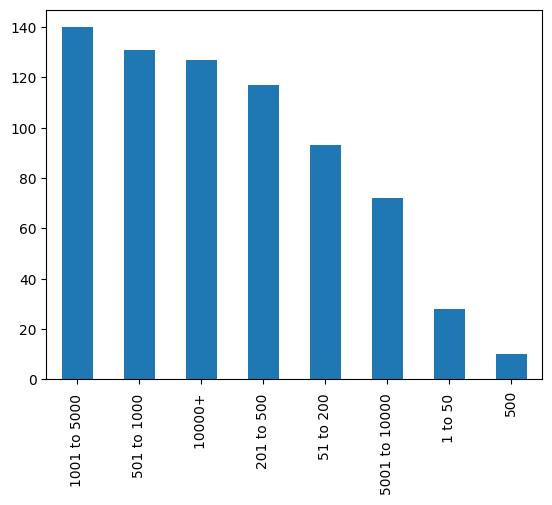

In [49]:
df.Size.value_counts().plot(kind = "bar")

In [50]:
df.EmSize = df.EmSize.astype("int32")

<Axes: >

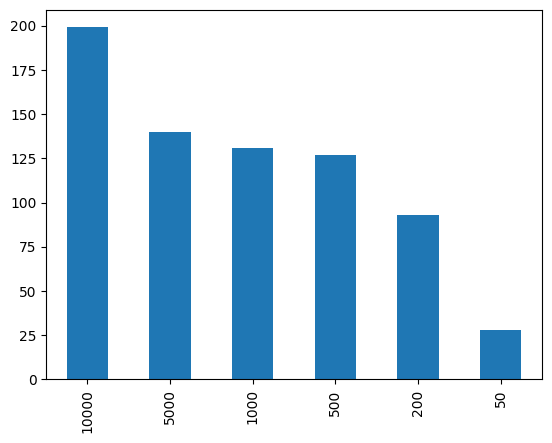

In [51]:
df.EmSize.value_counts().plot(kind = "bar")

In [52]:
df.drop(columns = "Size", inplace = True)

In [53]:
df.Location = df.Location.str.split(",", expand =True)[1]

In [54]:
df.Location = df.Location.str.replace(" Los Angeles",' CA')

In [55]:
df.Location.unique()

array([' NM', ' MD', ' FL', ' WA', ' NY', ' TX', ' CA', ' VA', ' MA',
       ' NJ', ' CO', ' IL', ' KY', ' OR', ' CT', ' MI', ' DC', ' OH',
       ' AL', ' MO', ' PA', ' GA', ' IN', ' LA', ' WI', ' NC', ' AZ',
       ' NE', ' MN', ' UT', ' TN', ' ID', ' RI', ' IA', ' SC', ' KS'],
      dtype=object)

In [56]:
df.Location = df.Location.str.replace(" ","")

In [57]:
df.Location.unique()

array(['NM', 'MD', 'FL', 'WA', 'NY', 'TX', 'CA', 'VA', 'MA', 'NJ', 'CO',
       'IL', 'KY', 'OR', 'CT', 'MI', 'DC', 'OH', 'AL', 'MO', 'PA', 'GA',
       'IN', 'LA', 'WI', 'NC', 'AZ', 'NE', 'MN', 'UT', 'TN', 'ID', 'RI',
       'IA', 'SC', 'KS'], dtype=object)

<Axes: >

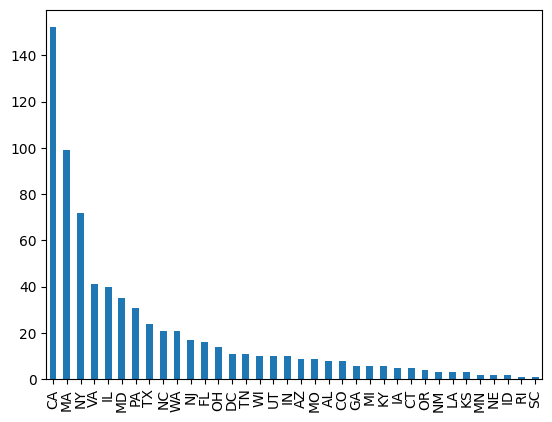

In [58]:
df.Location.value_counts().plot(kind = "bar")

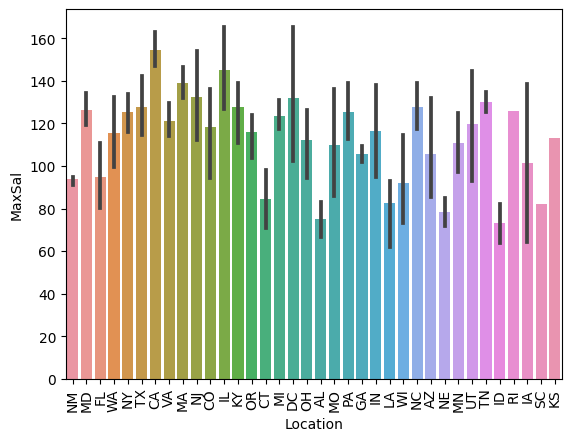

In [59]:
sns.barplot(x=df.Location,y=df.MaxSal)
plt.xticks(rotation ="vertical")
plt.show()


In [60]:
df.columns


Index(['Rating', 'Location', 'Founded', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel',
       'job_simp', 'seniority', 'desc_len', 'num_comp', 'MinSal', 'MaxSal',
       'EmSize'],
      dtype='object')

In [61]:
df.drop(columns = ["Founded"] , inplace = True)

In [62]:
df["Type of ownership"].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Subsidiary or Business Segment',
       'Nonprofit Organization', 'Unknown', 'College / University',
       'School / School District', '-1'], dtype=object)

<Axes: >

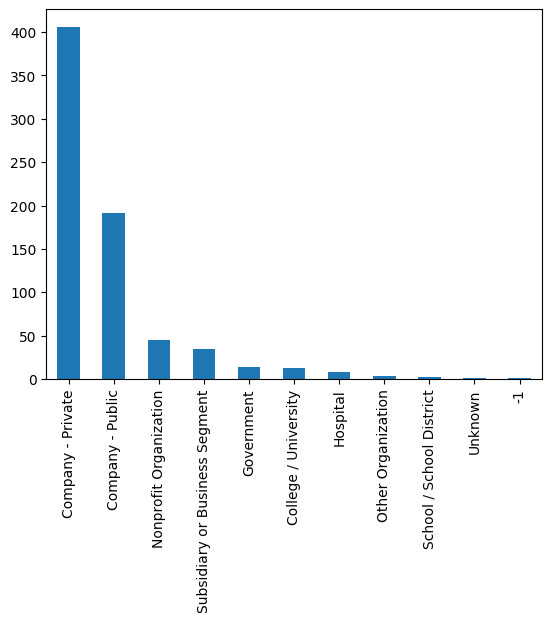

In [63]:
df["Type of ownership"].value_counts().plot(kind = "bar")

In [64]:
df["Type of ownership"][df["Type of ownership"] =='-1'] ='Other Organization'

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\4024983495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type of ownership"][df["Type of ownership"] =='-1'] ='Other Organization'


In [65]:
df["Type of ownership"][df["Type of ownership"] =='Unknown'] ='Other Organization'

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\2812786544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Type of ownership"][df["Type of ownership"] =='Unknown'] ='Other Organization'


<Axes: >

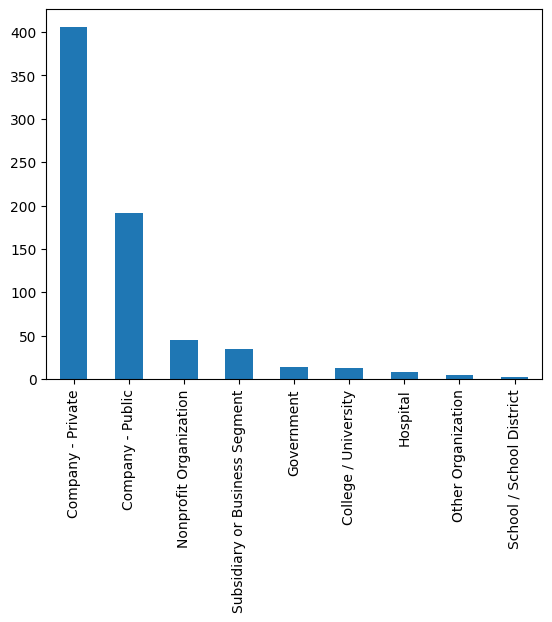

In [66]:
df["Type of ownership"].value_counts().plot(kind = "bar")

In [67]:
df.Industry.unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', '-1',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Staffing & Outsourcing', 'Wholesale',
       'Mining', 'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Support 

<Axes: >

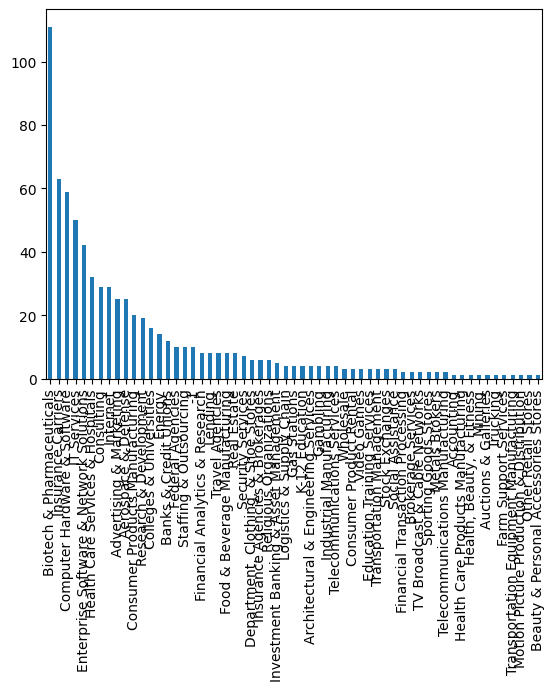

In [68]:
df.Industry.value_counts().plot(kind = "bar")

In [69]:
df.Industry[df.Industry =='-1'] ='Other'

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\2181080346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Industry[df.Industry =='-1'] ='Other'


<Axes: >

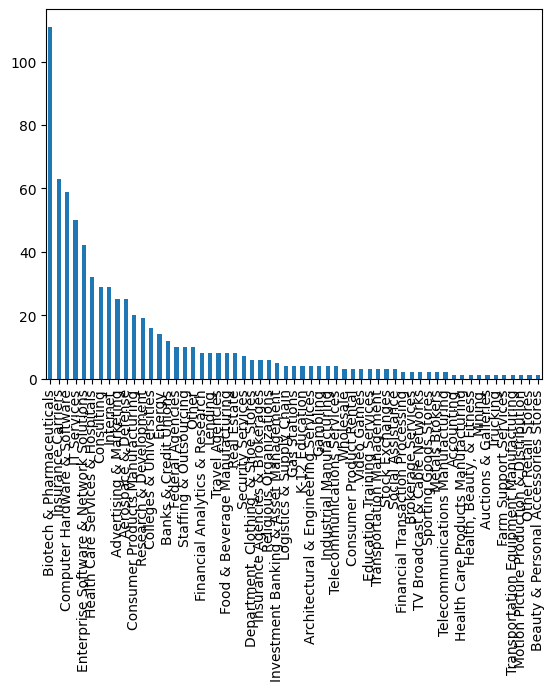

In [70]:
df.Industry.value_counts().plot(kind = "bar")

In [71]:
df.columns

Index(['Rating', 'Location', 'Type of ownership', 'Industry', 'Sector',
       'Revenue', 'Competitors', 'hourly', 'employer_provided', 'min_salary',
       'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'MinSal', 'MaxSal', 'EmSize'],
      dtype='object')

In [72]:
df.Sector.unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [73]:
df["Industry"].unique()

array(['Aerospace & Defense', 'Health Care Services & Hospitals',
       'Security Services', 'Energy', 'Advertising & Marketing',
       'Real Estate', 'Banks & Credit Unions', 'Consulting', 'Internet',
       'Other Retail Stores', 'Research & Development',
       'Department, Clothing, & Shoe Stores', 'Biotech & Pharmaceuticals',
       'Motion Picture Production & Distribution',
       'Enterprise Software & Network Solutions', 'Insurance Carriers',
       'Insurance Agencies & Brokerages', 'Logistics & Supply Chain',
       'Telecommunications Services', 'IT Services',
       'Computer Hardware & Software', 'Other',
       'Consumer Products Manufacturing', 'Industrial Manufacturing',
       'Metals Brokers', 'Financial Transaction Processing',
       'Sporting Goods Stores', 'Staffing & Outsourcing', 'Wholesale',
       'Mining', 'Financial Analytics & Research', 'Federal Agencies',
       'Education Training Services',
       'Transportation Equipment Manufacturing', 'Farm Suppo

In [74]:
df.Sector[df.Sector =='-1'] ='Other'

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\282642457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Sector[df.Sector =='-1'] ='Other'


<Axes: >

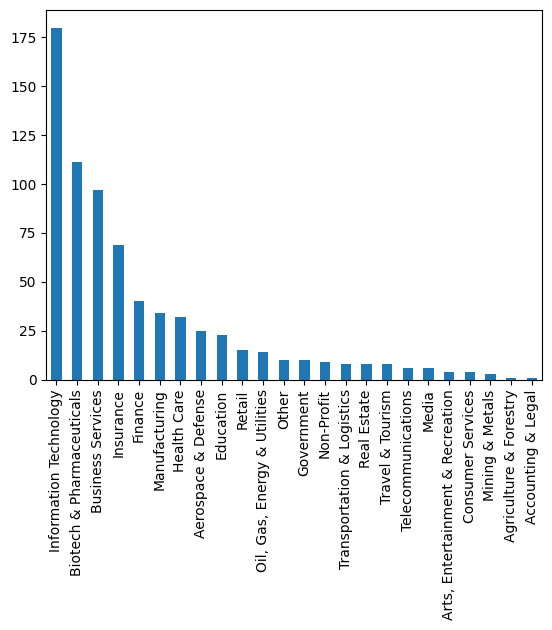

In [75]:
df.Sector.value_counts().plot(kind = "bar")

In [76]:
df.drop(columns = ["Industry"] , inplace = True)

In [77]:
df.Revenue.unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)', '-1'], dtype=object)

In [78]:
df.drop(columns = ["Revenue"] , inplace = True)

In [79]:
df.columns

Index(['Rating', 'Location', 'Type of ownership', 'Sector', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp', 'MinSal', 'MaxSal', 'EmSize'],
      dtype='object')

In [80]:
df.drop(columns = ["Competitors"] , inplace = True)

In [81]:
df.drop(columns = ["hourly"] , inplace = True)

In [82]:
df.drop(columns = 'employer_provided' , inplace = True)

In [83]:
df.avg_salary

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
737     84.5
738    102.5
739     73.5
740    127.5
741     93.5
Name: avg_salary, Length: 718, dtype: float64

In [84]:
df.drop(columns = ['MinSal', 'MaxSal'] , inplace = True)

In [85]:
df.columns

Index(['Rating', 'Location', 'Type of ownership', 'Sector', 'min_salary',
       'max_salary', 'avg_salary', 'company_txt', 'job_state', 'same_state',
       'age', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'EmSize'],
      dtype='object')

In [86]:
df.drop(columns = ['company_txt'] , inplace = True)

In [87]:
df['job_state']

0      NM
1      MD
2      FL
3      WA
4      NY
       ..
737    MA
738    TN
739    PA
740    PA
741    OH
Name: job_state, Length: 718, dtype: object

In [88]:
df.drop(columns = ['Location'] , inplace = True)

In [89]:
df.drop(columns = ['same_state'] , inplace = True)

In [90]:
df.age

0       47
1       36
2       10
3       55
4       22
      ... 
737    190
738     14
739     36
740     -1
741     53
Name: age, Length: 718, dtype: int64

<Axes: >

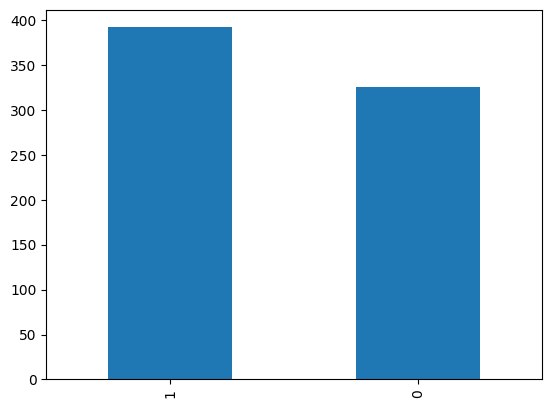

In [91]:
df['python_yn'].value_counts().plot(kind = "bar")

<Axes: >

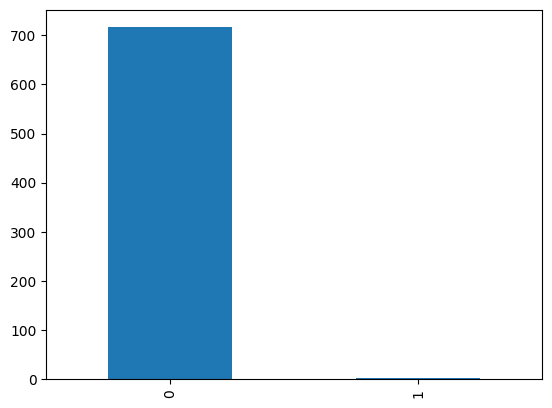

In [92]:
df['R_yn'].value_counts().plot(kind = "bar")

<Axes: >

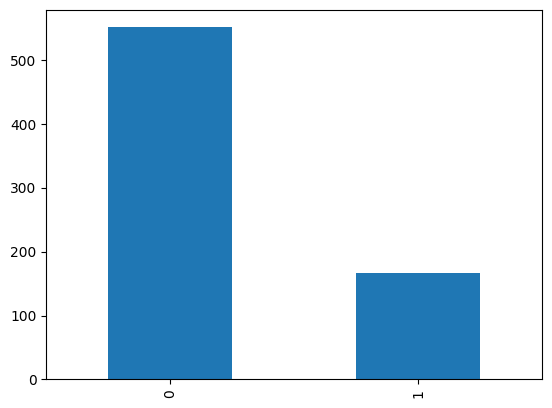

In [93]:
df['spark'].value_counts().plot(kind = "bar")

<Axes: >

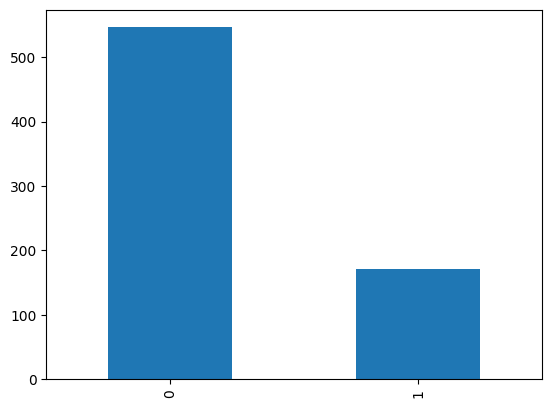

In [94]:
df['aws'].value_counts().plot(kind = "bar")

<Axes: >

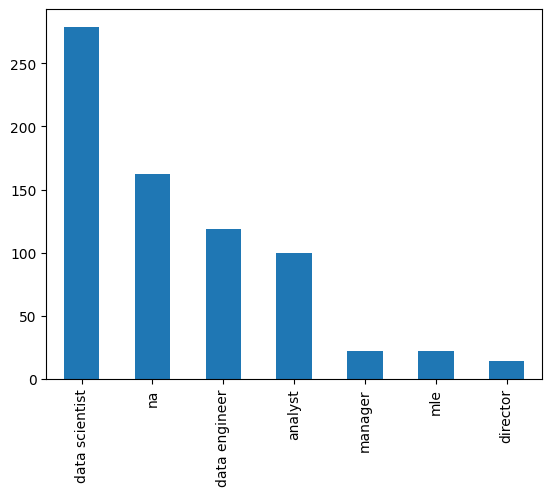

In [95]:
df['job_simp'].value_counts().plot(kind = "bar")

<Axes: xlabel='job_simp', ylabel='avg_salary'>

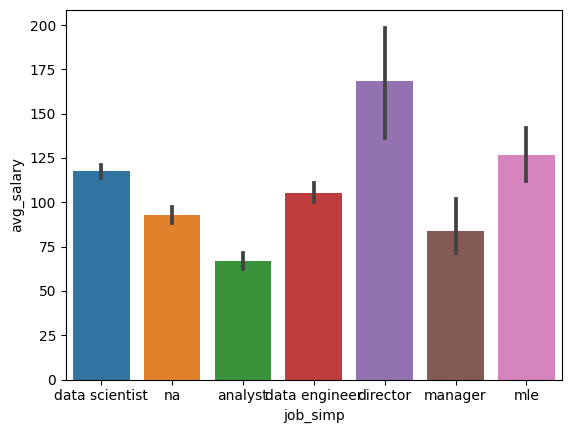

In [96]:
sns.barplot(x=df['job_simp'],y=df['avg_salary'])

<Axes: xlabel='seniority', ylabel='avg_salary'>

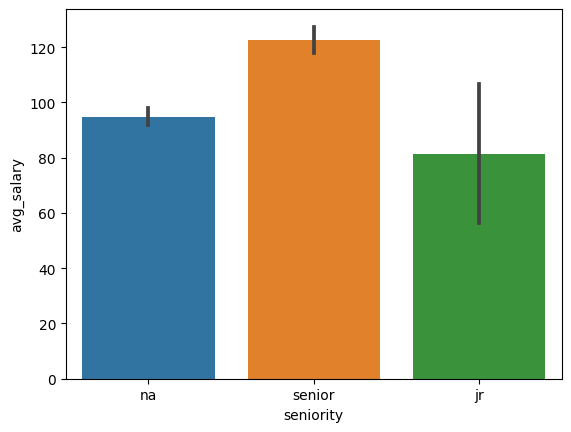

In [97]:
sns.barplot(x=df['seniority'],y=df['avg_salary'])

In [98]:
df.columns


Index(['Rating', 'Type of ownership', 'Sector', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp', 'EmSize'],
      dtype='object')

In [99]:
df['seniority'][df['seniority'] == "na"] = "junior"

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\1450284376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seniority'][df['seniority'] == "na"] = "junior"


In [100]:
df['seniority'][df['seniority'] == "jr"] = "junior"

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\1983915229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['seniority'][df['seniority'] == "jr"] = "junior"


<Axes: >

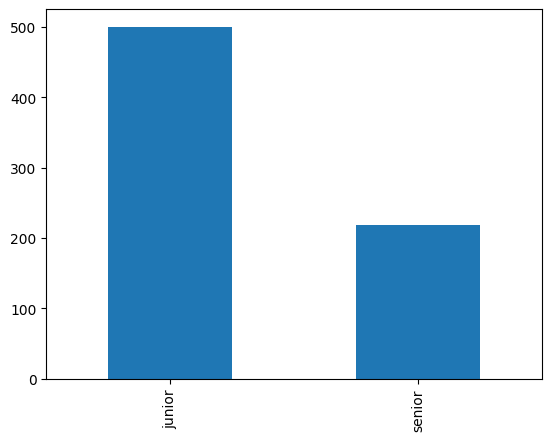

In [101]:
df['seniority'].value_counts().plot(kind = "bar")

In [102]:
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 718, dtype: int64

In [103]:
df.drop(columns = ['desc_len'] , inplace = True)

In [104]:
df.columns

Index(['Rating', 'Type of ownership', 'Sector', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'num_comp', 'EmSize'],
      dtype='object')

In [105]:
df.drop(columns = ['num_comp'] , inplace = True)

In [106]:
df


,Rating,Type of ownership,Sector,min_salary,max_salary,avg_salary,job_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,EmSize
0,3.8,Company - Private,Aerospace & Defense,53,91,72.0,NM,47,1,0,0,0,1,data scientist,junior,1000
1,3.4,Other Organization,Health Care,63,112,87.5,MD,36,1,0,0,0,0,data scientist,junior,10000
2,4.8,Company - Private,Business Services,80,90,85.0,FL,10,1,0,1,0,1,data scientist,junior,1000
3,3.8,Government,"Oil, Gas, Energy & Utilities",56,97,76.5,WA,55,1,0,0,0,0,data scientist,junior,5000
4,2.9,Company - Private,Business Services,86,143,114.5,NY,22,1,0,0,0,1,data scientist,junior,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,Company - Public,Biotech & Pharmaceuticals,58,111,84.5,MA,190,0,0,0,1,0,na,senior,10000
738,4.4,Company - Public,Information Technology,72,133,102.5,TN,14,1,0,1,1,0,data engineer,senior,5000
739,2.6,College / University,Education,56,91,73.5,PA,36,0,0,0,0,1,na,junior,1000
740,3.2,Company - Private,Business Services,95,160,127.5,PA,-1,0,0,0,0,1,manager,junior,50


In [107]:
df.columns

Index(['Rating', 'Type of ownership', 'Sector', 'min_salary', 'max_salary',
       'avg_salary', 'job_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'EmSize'],
      dtype='object')

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\316555093.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["age"])


<Axes: xlabel='age', ylabel='Density'>

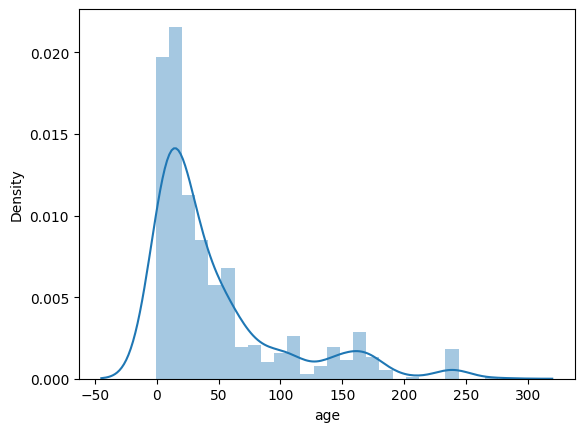

In [108]:
sns.distplot(df["age"])

<Axes: >

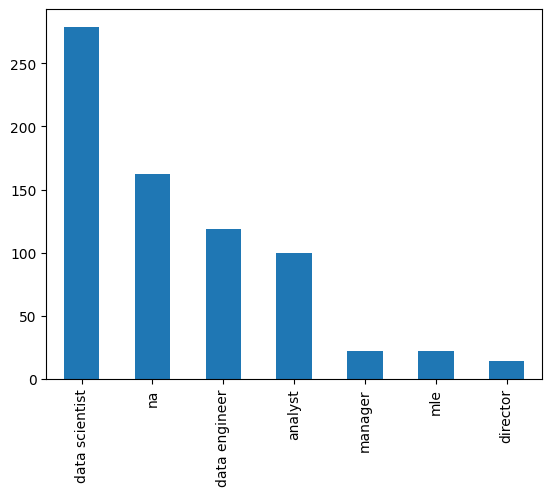

In [109]:
df["job_simp"].value_counts().plot(kind  = "bar")

## REGRESSION

#### MIN SALARY

In [110]:
X =df.drop(columns = ['min_salary', 'max_salary','avg_salary'])

In [111]:
X

,Rating,Type of ownership,Sector,job_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,EmSize
0,3.8,Company - Private,Aerospace & Defense,NM,47,1,0,0,0,1,data scientist,junior,1000
1,3.4,Other Organization,Health Care,MD,36,1,0,0,0,0,data scientist,junior,10000
2,4.8,Company - Private,Business Services,FL,10,1,0,1,0,1,data scientist,junior,1000
3,3.8,Government,"Oil, Gas, Energy & Utilities",WA,55,1,0,0,0,0,data scientist,junior,5000
4,2.9,Company - Private,Business Services,NY,22,1,0,0,0,1,data scientist,junior,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,3.9,Company - Public,Biotech & Pharmaceuticals,MA,190,0,0,0,1,0,na,senior,10000
738,4.4,Company - Public,Information Technology,TN,14,1,0,1,1,0,data engineer,senior,5000
739,2.6,College / University,Education,PA,36,0,0,0,0,1,na,junior,1000
740,3.2,Company - Private,Business Services,PA,-1,0,0,0,0,1,manager,junior,50


In [112]:
y = df['min_salary']

In [113]:
y

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 718, dtype: int64

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\3909080637.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(y))


<Axes: xlabel='min_salary', ylabel='Density'>

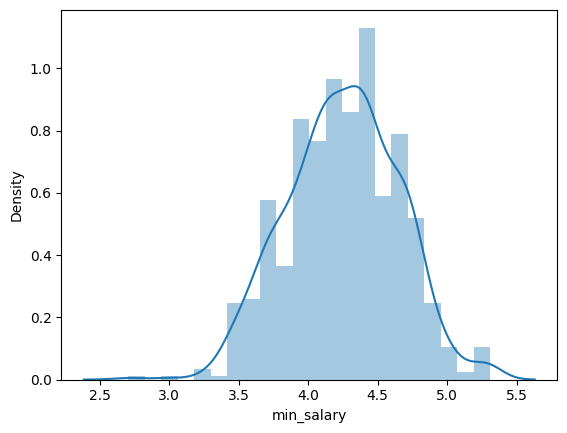

In [120]:
sns.distplot(np.log(y))

In [121]:
y=np.log(y)

In [115]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error


In [116]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor


In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [123]:
X_train

,Rating,Type of ownership,Sector,job_state,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,EmSize
538,3.0,Subsidiary or Business Segment,Information Technology,FL,43,0,0,0,0,1,analyst,junior,5000
425,3.6,Company - Private,Insurance,MA,169,1,0,1,0,1,data engineer,junior,10000
13,4.1,Company - Private,Business Services,WA,8,1,0,1,1,1,analyst,junior,500
237,2.9,Nonprofit Organization,Education,VA,27,1,0,0,0,1,analyst,senior,500
413,3.1,Company - Private,Manufacturing,NC,145,0,0,0,0,1,na,senior,10000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,3.6,Company - Private,Other,MA,-1,0,0,0,0,1,na,junior,500
601,3.5,Company - Private,Information Technology,CA,51,1,0,1,0,1,na,junior,5000
507,3.2,Subsidiary or Business Segment,Information Technology,CA,14,0,0,0,1,1,data scientist,senior,1000
544,2.4,Company - Private,Biotech & Pharmaceuticals,CA,14,0,0,0,0,0,na,junior,1000


In [124]:

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore' ),[1,2,3,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)
X_test

y_pred = pipe.predict(X_test)


print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.48747103594955876
MAE 0.2063504769669405


In [125]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore'),[1,2,3,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.51684332946814
MAE 0.20181404775532008


In [128]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore' ),[1,2,3,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=2,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6505097872016583
MAE 0.16074878832794398


In [129]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe1.pkl','wb'))

#### AVG SALARY

In [130]:
y = df['avg_salary']

In [131]:
y=np.log(y)

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='avg_salary', ylabel='Density'>

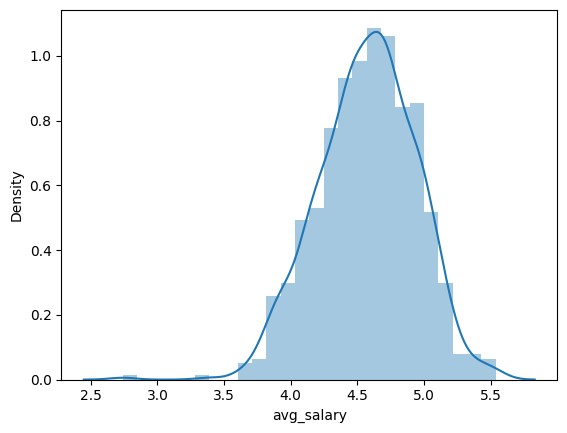

In [132]:
sns.distplot(y)

In [133]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [147]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore' ),[1,2,3,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=2,
                              max_samples=0.6,
                              max_features=0.80,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.654641405170628
MAE 0.14297977895419123


In [148]:

pickle.dump(pipe,open('pipe2.pkl','wb'))

#### MAX SALARY

In [149]:
y = df['max_salary']

In [150]:
y=np.log(y)

C:\Users\subar\AppData\Local\Temp\ipykernel_20356\476133659.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y)


<Axes: xlabel='max_salary', ylabel='Density'>

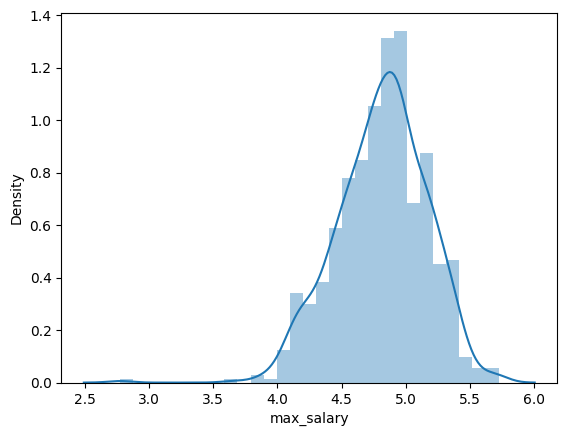

In [151]:
sns.distplot(y)

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [153]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(handle_unknown='ignore' ),[1,2,3,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=200,
                              random_state=2,
                              max_samples=0.5
                              ,
                              max_features=0.80,
                              max_depth=20)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.6341929654583253
MAE 0.1422609081375978
